In [8]:
# build computing graph of tensorflow

import tensorflow as tf

tf_c = tf.constant(2, name='const')
tf_x = tf.Variable(tf_c+5, name='tf_x')

width = tf.placeholder('int32')
height = tf.placeholder('int32')
area = tf.multiply(width, height)

# executing
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('tf_c: ', sess.run(tf_c))
    print('tf_x: ',sess.run(tf_x))
    print('eval of tf_x: ', tf_x.eval(session=sess))
    
    print('area: ', sess.run(area, feed_dict={width: 5, height: 3}))


tf_c:  2
tf_x:  7
eval of tf_x:  7
area:  15


In [9]:
# output the file for TensorBoard
tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/area', sess.graph)

In [19]:
# building the vector
tf_vec = tf.Variable([0.4, 0.2, 0.4])
tf_mat_a = tf.Variable([[1, 2, 3]])
tf_mat_b = tf.Variable([[1, 3, 5],
                  [2, 4, 6],
                  [9, 10, 11]])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    vec = sess.run(tf_vec)
    print(vec)
    print('shape: ', vec.shape)
    
    mat_a = sess.run(tf_mat_a)
    mat_b = sess.run(tf_mat_b)
    print('mat a: ', mat_a)
    print('shape: ', mat_a.shape)
    print('mat b: ', mat_b)
    print('shape: ', mat_b.shape)
    
    tf_mat_mul = tf.matmul(mat_a, mat_b)
    mat_mul = tf_mat_mul.eval(session=sess)
    print('mat_mul: ', mat_mul)

[0.4 0.2 0.4]
shape:  (3,)
mat a:  [[1 2 3]]
shape:  (1, 3)
mat b:  [[ 1  3  5]
 [ 2  4  6]
 [ 9 10 11]]
shape:  (3, 3)
mat_mul:  [[32 41 50]]


In [2]:
# build simple neuron cell
import tensorflow as tf

W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4, 0.2, 0.4]])
y = tf.nn.relu(tf.matmul(X, W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print("b: ", sess.run(b))
    print("w: ", sess.run(W))
    print("y: ", sess.run(y))
    
    
# output the file for TensorBoard
tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/simple_neuron', sess.graph)
                

b:  [[ 0.63045037 -0.12718733]]
w:  [[ 0.6219065 -0.8460073]
 [-1.5097703  1.9109548]
 [ 1.3266736  0.0446865]]
y:  [[1.1079284 0.       ]]


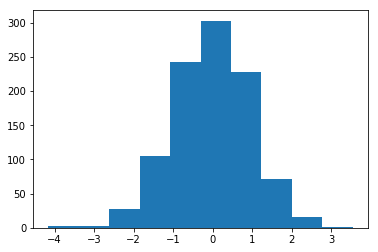

In [4]:
import matplotlib.pyplot as plt

tf_norm = tf.random_normal([1000])
with tf.Session() as sess:
    norm_data = tf_norm.eval()
    
plt.hist(norm_data)
plt.show()

In [9]:
# simple neron cell with X as placeholder

import tensorflow as tf
import numpy as np

W = tf.Variable(tf.random_normal([3, 2]), name='W')
b = tf.Variable(tf.random_normal([1, 2]), name='b')
X = tf.placeholder('float', [None, 3], name='X')
y = tf.nn.relu(tf.matmul(X, W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array =  tf.random_normal([5, 3]).eval()
    (data_W, data_b, data_y) = sess.run((W, b, y), feed_dict={X: X_array})
    print('X: ', X_array)
    print("b: ", data_b)
    print("w: ", data_W)
    print("y: ", data_y)
    
    
# output the file for TensorBoard
tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/simple_neuron_placeholder', sess.graph)

X:  [[-1.0300138  -1.6009283  -0.5528115 ]
 [-1.3795671  -0.38763696 -0.7093909 ]
 [ 0.50435466 -1.0269407   0.8337711 ]
 [ 0.58627695  0.36531457  0.30582187]
 [ 0.04544379  0.64467025 -2.4804387 ]]
b:  [[0.33408353 0.6193562 ]]
w:  [[ 0.6450785   0.61123765]
 [ 0.26036376 -2.075644  ]
 [-2.0446055   1.0814551 ]]
y:  [[0.38310155 2.7148895 ]
 [0.7936523  0.        ]
 [0.         3.960886  ]
 [0.18210775 0.5501804 ]
 [5.6027656  0.        ]]


In [10]:
# layer builder
import tensorflow as tf
import numpy as np

def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
        
    return outputs, W, b

In [16]:
# build nn with layer builder
X = tf.placeholder('float', [None, 4])
h, w1, b1 = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y, w2, b2 = layer(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = tf.random_normal([1, 4]).eval()
    (layer_X, layer_h, layer_y, w1_data, b1_data, w2_data, b2_data) = sess.run((X, h, y, w1, b1, w2, b2), feed_dict={X: X_array})
    
    print('layer_x: ', layer_X)
    print('w1: ', w1_data)
    print('b1: ', b1)
    print('layer_h: ', layer_h)
    print('w2: ', w2)
    print('b2: ', b2)
    print('layer_y: ', layer_y)

layer_x:  [[-0.94189125 -1.2169755   0.67086726 -1.7853245 ]]
layer_h:  [[1.3886313  3.587839   0.84659207]]
layer_y:  [[ 2.281006  -4.0990734]]


In [2]:
# build model for mnist
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print('mnist train size: ', mnist.train.num_examples,
     'validation size: ', mnist.validation.num_examples,
     'test size: ', mnist.test.num_examples) 

mnist train size:  55000 validation size:  5000 test size:  10000


In [9]:
import matplotlib.pyplot as plt
import numpy as np
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show

first lable value:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] argmax:  7


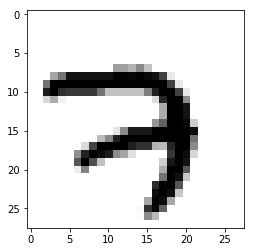

In [10]:
plot_image(mnist.train.images[0])
print('first lable value: ', mnist.train.labels[0],
      'argmax: ', np.argmax(mnist.train.labels[0]))